In [1]:
##tensorflow - A powerful library for machine learning and deep learning,Building and training neural networks
##matplotlib - Plotting graphs, Visualizing training history , Displaying images.
##pandas - A library for data manipulation and analysis
## seaborn - A library built on top of Matplotlib for statistical data visualization.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None, 
    color_mode="rgb",
    batch_size=32, ## (no of images in 1 batch)
    image_size=(128, 128),
    shuffle=True,   ## avoid biasness(random order)
    seed=None,  ## same sequence
    validation_split=None,  ##entire dataset is used for training
    subset=None,   
    interpolation="bilinear",  ## method to resize images
    follow_links=False,
    crop_to_aspect_ratio=False,   ##image is resized directly to the target size
)

Found 42700 files belonging to 23 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10674 files belonging to 23 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 23), dtype=tf.float32, name=None))>

In [5]:
##x is a tensor containing a batch of images.
## y is a tensor containing the corresponding labels.

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[141.75 127.75 126.75]
   [141.   127.   126.  ]
   [138.   124.   123.  ]
   ...
   [156.75 146.75 144.75]
   [161.25 151.25 149.25]
   [154.5  144.5  142.5 ]]

  [[138.25 124.25 123.25]
   [135.5  121.5  120.5 ]
   [132.5  118.5  117.5 ]
   ...
   [157.5  147.5  145.5 ]
   [144.25 134.25 132.25]
   [162.5  152.5  150.5 ]]

  [[141.   127.   126.  ]
   [140.   126.   125.  ]
   [140.75 126.75 125.75]
   ...
   [153.75 143.75 141.75]
   [154.75 144.75 142.75]
   [163.   153.   151.  ]]

  ...

  [[143.5  129.5  129.5 ]
   [124.75 110.75 110.75]
   [133.   119.   119.  ]
   ...
   [159.25 149.25 148.25]
   [163.25 153.25 152.25]
   [159.   149.   148.  ]]

  [[147.25 133.25 133.25]
   [139.5  125.5  125.5 ]
   [137.25 123.25 123.25]
   ...
   [148.5  138.5  137.5 ]
   [157.5  147.5  146.5 ]
   [157.   147.   146.  ]]

  [[142.75 128.75 128.75]
   [140.25 126.25 126.25]
   [128.   114.   114.  ]
   ...
   [154.5  144.5  143.5 ]
   [146.5  136.5  135.5 ]
   [164.5  154.5  15

In [7]:
## Building Convolution Layer

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 23
inputs = keras.Input(shape=(128, 128, 3))
x = layers.Rescaling(1./255)(inputs)                # Normalize inputs
x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(32, (3,3), activation='relu')(x)
x = layers.MaxPool2D(2,2)(x)
x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPool2D(2,2)(x)
x = layers.Conv2D(128, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(128, (3,3), activation='relu')(x)
x = layers.MaxPool2D(2,2)(x)
x = layers.Conv2D(256, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(256, (3,3), activation='relu')(x)
x = layers.MaxPool2D(2,2)(x)
x = layers.Conv2D(512, (3,3), padding='same', activation='relu')(x)
x = layers.Conv2D(512, (3,3), activation='relu')(x)
x = layers.MaxPool2D(2,2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(1500, activation='relu')(x)
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [14]:
##Compiling Model

In [15]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 7,820,247 (29.83 MB)

 Trainable params: 7,820,247 (29.83 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 1118s 831ms/step - accuracy: 0.2398 - loss: 2.4038 - val_accuracy: 0.6944 - val_loss: 0.9381
Epoch 2/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 1099s 823ms/step - accuracy: 0.7216 - loss: 0.8533 - val_accuracy: 0.8026 - val_loss: 0.5867
Epoch 3/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 750s 561ms/step - accuracy: 0.8201 - loss: 0.5335 - val_accuracy: 0.8690 - val_loss: 0.3878
Epoch 4/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 429s 321ms/step - accuracy: 0.8648 - loss: 0.3931 - val_accuracy: 0.9073 - val_loss: 0.2816
Epoch 5/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 427s 320ms/step - accuracy: 0.9022 - loss: 0.2892 - val_accuracy: 0.8900 - val_loss: 0.3384
Epoch 6/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 433s 325ms/step - accuracy: 0.9202 - loss: 0.2329 - val_accuracy: 0.9303 - val_loss: 0.2159
Epoch 7/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 429s 321ms/step - accuracy: 0.9334 - loss: 0.1941 - val_accuracy: 0.9374 - val_loss: 0.1912
Epoch 8/10
1335/1335 ━━━━━━━━━━━━━━━━━━━━ 429s 321ms/step - 

In [18]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

1335/1335 ━━━━━━━━━━━━━━━━━━━━ 122s 91ms/step - accuracy: 0.9723 - loss: 0.0801


In [19]:
print(train_loss,train_acc)

0.07451072335243225 0.9744027853012085


In [20]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

334/334 ━━━━━━━━━━━━━━━━━━━━ 28s 83ms/step - accuracy: 0.9354 - loss: 0.2130


In [21]:
print(val_loss,val_acc)

0.19813525676727295 0.9374180436134338


In [22]:
##SAVING MODEL

In [29]:


# Save in HDF5 format
model.save("plant_disease_model.keras")

print("✅ Saved model as .keras")

✅ Saved model as .keras


In [30]:
training_history.history

{'accuracy': [0.43051522970199585,
  0.7521311640739441,
  0.8360655903816223,
  0.8763700127601624,
  0.9071194529533386,
  0.9220843315124512,
  0.9357611536979675,
  0.945807933807373,
  0.9521780014038086,
  0.9610069990158081],
 'loss': [1.7810686826705933,
  0.7569600939750671,
  0.48907724022865295,
  0.3654671013355255,
  0.27658116817474365,
  0.2259291559457779,
  0.1866966038942337,
  0.15646295249462128,
  0.14036469161510468,
  0.11665066331624985],
 'val_accuracy': [0.6943976283073425,
  0.8026044368743896,
  0.8690275549888611,
  0.907251238822937,
  0.8900130987167358,
  0.9302979111671448,
  0.9374180436134338,
  0.9260820746421814,
  0.9273936748504639,
  0.9374180436134338],
 'val_loss': [0.938143789768219,
  0.5867097973823547,
  0.3877910077571869,
  0.28157904744148254,
  0.33843082189559937,
  0.21586278080940247,
  0.19119511544704437,
  0.22657442092895508,
  0.22555138170719147,
  0.1981353759765625]}

In [31]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [32]:
training_history.history['val_accuracy']

[0.6943976283073425,
 0.8026044368743896,
 0.8690275549888611,
 0.907251238822937,
 0.8900130987167358,
 0.9302979111671448,
 0.9374180436134338,
 0.9260820746421814,
 0.9273936748504639,
 0.9374180436134338]

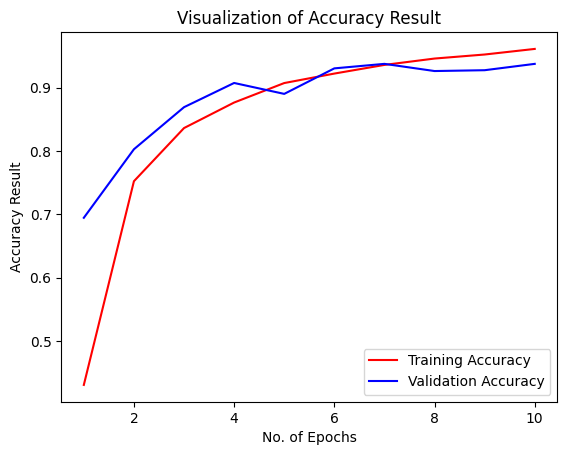

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [34]:
##Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10674 files belonging to 23 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

334/334 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step


(array([[9.9997342e-01, 2.5877651e-05, 7.7100652e-11, ..., 4.6384425e-14,
         6.6738504e-16, 3.8493392e-13],
        [9.9998116e-01, 4.0368009e-06, 3.7190258e-11, ..., 7.5891192e-13,
         1.6868553e-14, 2.3643344e-12],
        [9.9999833e-01, 1.2968156e-06, 3.0364196e-09, ..., 1.9275061e-12,
         1.2807599e-12, 6.1689676e-10],
        ...,
        [2.1724391e-08, 8.6529259e-13, 9.3820738e-05, ..., 9.0665857e-08,
         1.8124162e-10, 9.9987638e-01],
        [1.7748564e-08, 1.8383248e-12, 5.5726424e-08, ..., 3.3898419e-07,
         2.2708523e-11, 9.9954695e-01],
        [1.4855520e-11, 7.0612088e-12, 1.6968791e-13, ..., 7.9459928e-12,
         1.4535646e-09, 9.9992180e-01]], dtype=float32),
 (10674, 23))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [39]:
predicted_categories

<tf.Tensor: shape=(10674,), dtype=int64, numpy=array([ 0,  0,  0, ..., 22, 22, 22])>

In [40]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(10674, 23), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(10674,), dtype=int64, numpy=array([ 0,  0,  0, ..., 22, 22, 22])>

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.94      0.93       504
                                 Apple___Black_rot       0.95      1.00      0.97       497
                          Apple___Cedar_apple_rust       0.93      0.97      0.95       440
                                   Apple___healthy       0.98      0.88      0.93       502
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.95       477
                            Corn_(maize)___healthy       1.00      1.00      1.00       465
                            Peach___Bacterial_spot       0.96      0.93      0.94       459
                                   Peach___healthy       0.98      0.98      0.

In [46]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[473,  13,   4,   0,   1,   0,   0,   0,   2,   0,   4,   0,   0,
          0,   1,   1,   1,   2,   0,   1,   0,   0,   1],
       [  0, 495,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 429,   0,   2,   0,   0,   0,   0,   0,   0,   0,   1,
          6,   0,   0,   0,   0,   0,   0,   1,   0,   0],
       [ 23,   5,   0, 440,   0,   0,   1,   0,   4,   5,   0,   1,   0,
         10,   1,   1,   2,   2,   1,   5,   0,   0,   1],
       [  2,   0,   0,   0, 370,   3,  29,   0,   2,   0,   1,   0,   0,
          0,   3,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2, 472,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   3,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,  10,   1, 464,   0,   0,   0,   0,   0,   0,
          0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 463,   0,   0,   0,   0,   0,
   

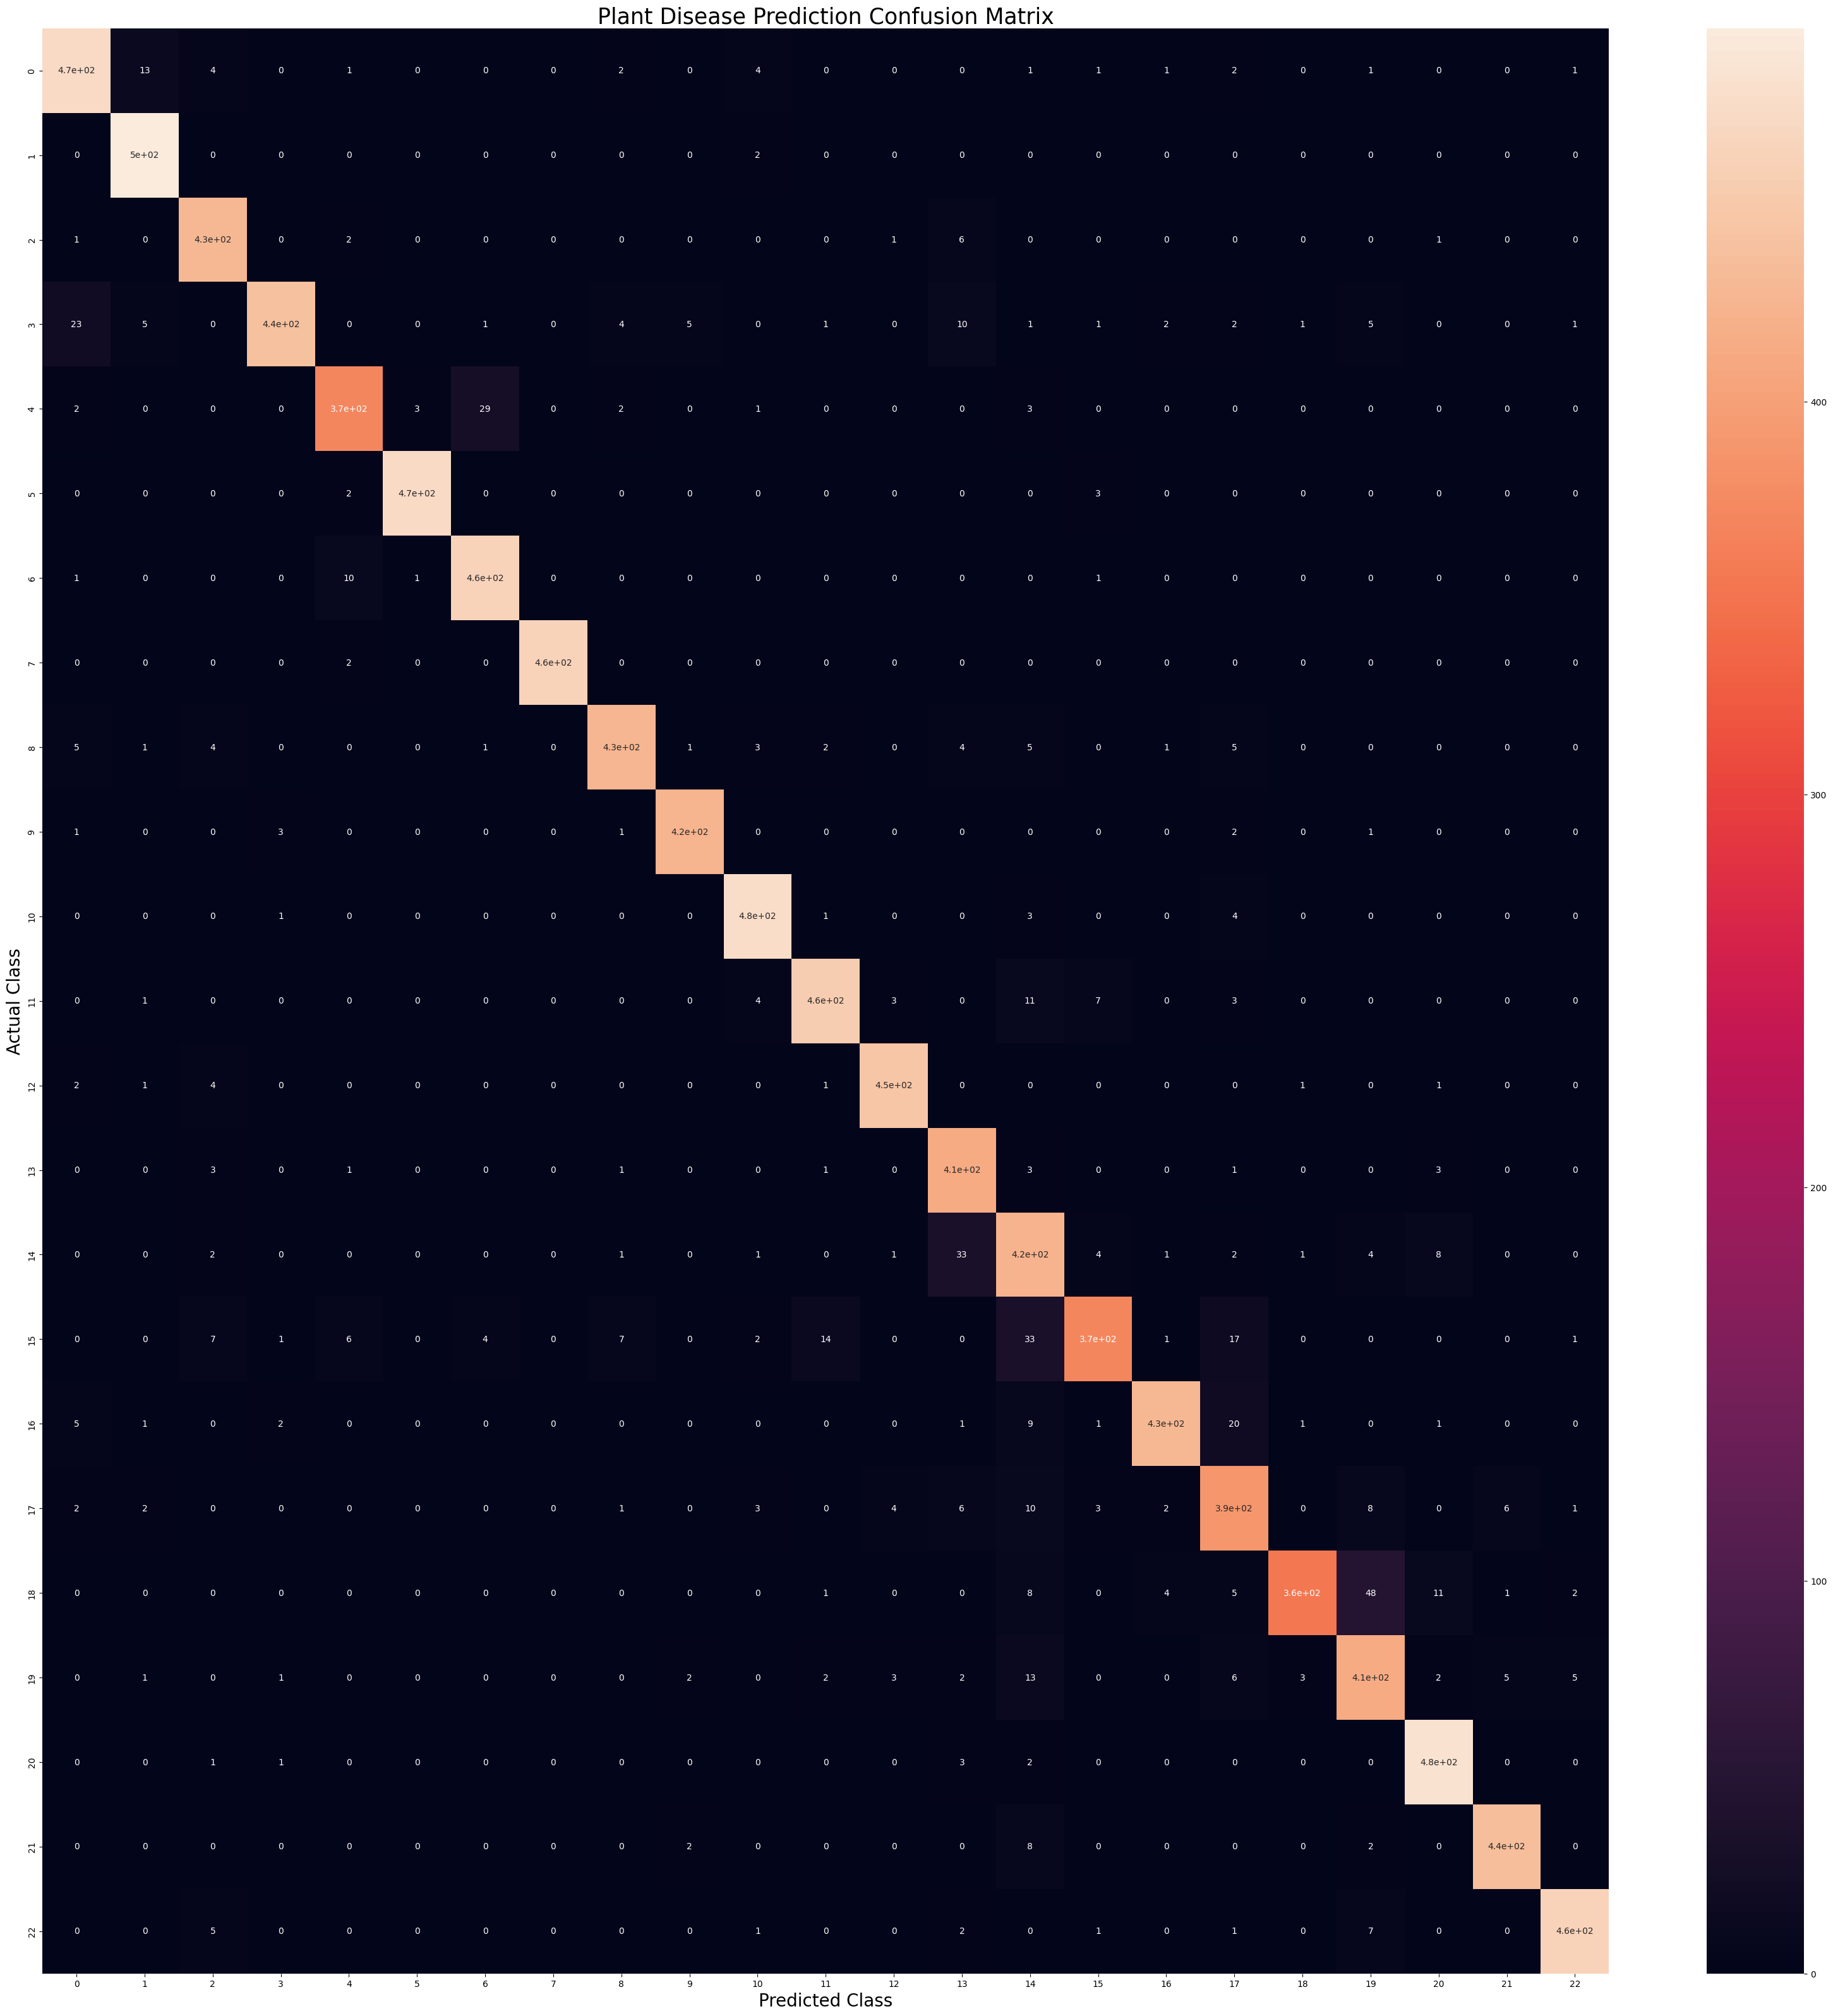

In [47]:
##Confusion Matrix Visualization
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()